Dataset: Human Development index 

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ineq= pd.read_csv('../data/Coef_ineq_2010_2022.csv', sep = ",")
df_ineq.columns = df_ineq.columns.str.replace(' ','_')
df_ineq.columns = df_ineq.columns.str.lower()
df_ineq.head(15)

,country,year,coef_ineq
0,Afghanistan,2010,35.767810
1,Albania,2010,13.314177
2,Algeria,2010,NaN
3,Andorra,2010,NaN
4,Angola,2010,NaN
5,Antigua and Barbuda,2010,NaN
6,Argentina,2010,13.836672
7,Armenia,2010,10.327847
8,Australia,2010,9.599267
9,Austria,2010,8.245704


In [3]:
df_ineq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    2535 non-null   object 
 1   year       2535 non-null   int64  
 2   coef_ineq  1963 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.5+ KB


In [4]:
df_ineq.replace({'Bolivia (Plurinational State of)': 'Bolivia',
                  'Eswatini (Kingdom of)': 'Eswatini',
                  'Iran (Islamic Republic of)': 'Iran',
                  'Moldova (Republic of)': 'Moldova',
                  'Russian Federation': 'Russia',
                  'Syrian Arab Republic': 'Syria',
                  'Tanzania (United Republic of)': 'Tanzania',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela',
                  'Viet Nam ':'Vietnam',
                  }, inplace= True)


In [5]:
df_ineq.country.value_counts()

country
Afghanistan                           13
Saint Kitts and Nevis                 13
Netherlands                           13
New Zealand                           13
Nicaragua                             13
Niger                                 13
Nigeria                               13
North Macedonia                       13
Norway                                13
Oman                                  13
Pakistan                              13
Palau                                 13
Palestine, State of                   13
Panama                                13
Papua New Guinea                      13
Paraguay                              13
Peru                                  13
Philippines                           13
Poland                                13
Portugal                              13
Qatar                                 13
Romania                               13
Russia                                13
Nepal                                 13
Nauru   

In [6]:
df_ineq['year_country'] = df_ineq['year'].astype('string') +' ' + df_ineq['country']
df_ineq.head(5)

,country,year,coef_ineq,year_country
0,Afghanistan,2010,35.767810,2010 Afghanistan
1,Albania,2010,13.314177,2010 Albania
2,Algeria,2010,NaN,2010 Algeria
3,Andorra,2010,NaN,2010 Andorra
4,Angola,2010,NaN,2010 Angola


In [7]:
df_happy= pd.read_csv('../data/DataForTable2.1WHR2023.txt', sep = "\s*,\s*")
df_happy.columns = df_happy.columns.str.replace(' ','_')
df_happy.columns = df_happy.columns.str.lower()
df_happy = df_happy.drop('generosity', axis=1)
df_happy.head(15)

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_6584/4103288919.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_happy= pd.read_csv('../data/DataForTable2.1WHR2023.txt', sep = "\s*,\s*")


,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,0.954,0.435,0.371


In [8]:
df_happy['year_country'] = df_happy['year'].astype('string') +' ' + df_happy['country_name']
df_happy.head(5)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect,year_country
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.882,0.414,0.258,2008 Afghanistan
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.850,0.481,0.237,2009 Afghanistan
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.707,0.517,0.275,2010 Afghanistan
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.731,0.480,0.267,2011 Afghanistan
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.776,0.614,0.268,2012 Afghanistan


In [10]:
df_combine = pd.merge(df_ineq, df_happy, on=['year_country'], how='left')
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           2535 non-null   object 
 1   year_x                            2535 non-null   int64  
 2   coef_ineq                         1963 non-null   float64
 3   year_country                      2535 non-null   string 
 4   country_name                      1687 non-null   object 
 5   year_y                            1687 non-null   float64
 6   life_ladder                       1687 non-null   float64
 7   log_gdp_per_capita                1677 non-null   float64
 8   social_support                    1677 non-null   float64
 9   healthy_life_expectancy_at_birth  1678 non-null   float64
 10  freedom_to_make_life_choices      1665 non-null   float64
 11  perceptions_of_corruption         1589 non-null   float64
 12  positi

In [12]:
hdi_countries = df_ineq.country.unique()
life_countries = df_happy.country_name.unique()

In [13]:
no_intersect = np.setxor1d(hdi_countries, life_countries)
no_intersect

array(['Andorra', 'Antigua and Barbuda', 'Bahamas', 'Barbados',
       'Brunei Darussalam', 'Cabo Verde', 'Congo', 'Congo (Brazzaville)',
       'Congo (Democratic Republic of the)', 'Congo (Kinshasa)',
       "Cote d'Ivoire", 'Dominica', 'Equatorial Guinea', 'Eritrea',
       'Fiji', 'Grenada', 'Guinea-Bissau', 'Ivory Coast', 'Kiribati',
       'Kosovo', 'Liechtenstein', 'Marshall Islands', 'Micronesia',
       'Monaco', 'Nauru', 'North Korea', 'Palau', 'Palestine, State of',
       'Papua New Guinea', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Solomon Islands',
       'Somaliland region', 'State of Palestine',
       'Taiwan Province of China', 'Timor-Leste', 'Tonga', 'Tuvalu',
       'Vanuatu'], dtype=object)

In [14]:
df_combine.query('life_ladder.isnull()').country.value_counts()

country
Andorra                               13
Guinea-Bissau                         13
Kiribati                              13
North Korea                           13
Liechtenstein                         13
Marshall Islands                      13
Micronesia                            13
Monaco                                13
Nauru                                 13
Palau                                 13
Palestine, State of                   13
Papua New Guinea                      13
Saint Kitts and Nevis                 13
Saint Lucia                           13
Saint Vincent and the Grenadines      13
Samoa                                 13
San Marino                            13
Seychelles                            13
Solomon Islands                       13
Timor-Leste                           13
Tonga                                 13
Tuvalu                                13
Vanuatu                               13
Guyana                                13
Sao Tome

In [15]:
df_combine.columns

Index(['country', 'year_x', 'coef_ineq', 'year_country', 'country_name',
       'year_y', 'life_ladder', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

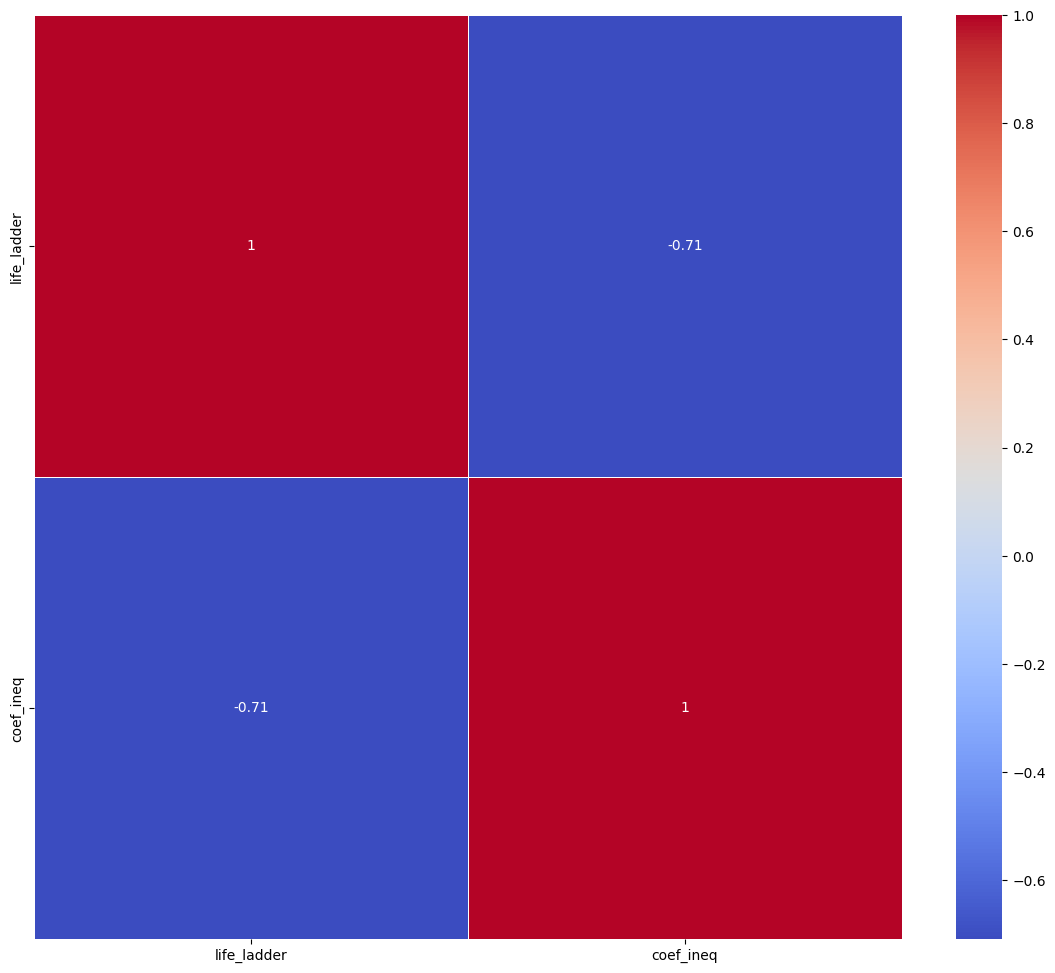

In [17]:
corr_columns=['life_ladder', 'coef_ineq',]
plt.figure(figsize = (14,12))
ax = sns.heatmap(df_combine[corr_columns].corr(),
                 linewidths=.5, annot=True, cmap='coolwarm')

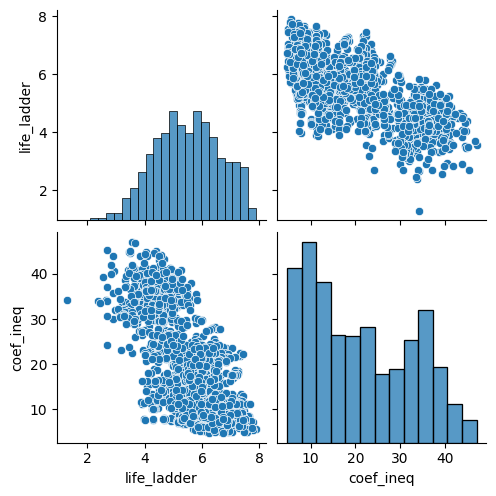

In [18]:
# Plot pair plot of potential features
sns.pairplot(df_combine[corr_columns]);

In [19]:
df_combine.columns

Index(['country', 'year_x', 'coef_ineq', 'year_country', 'country_name',
       'year_y', 'life_ladder', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

In [21]:
df_extract = df_combine[['country_name', 'year_y', 
       'life_ladder', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'coef_ineq']]

In [22]:
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1687 non-null   object 
 1   year_y                            1687 non-null   float64
 2   life_ladder                       1687 non-null   float64
 3   log_gdp_per_capita                1677 non-null   float64
 4   social_support                    1677 non-null   float64
 5   healthy_life_expectancy_at_birth  1678 non-null   float64
 6   freedom_to_make_life_choices      1665 non-null   float64
 7   perceptions_of_corruption         1589 non-null   float64
 8   positive_affect                   1670 non-null   float64
 9   negative_affect                   1674 non-null   float64
 10  coef_ineq                         1963 non-null   float64
dtypes: float64(10), object(1)
memory usage: 218.0+ KB


In [23]:
df_extract.dropna(inplace=True)
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 0 to 2534
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1448 non-null   object 
 1   year_y                            1448 non-null   float64
 2   life_ladder                       1448 non-null   float64
 3   log_gdp_per_capita                1448 non-null   float64
 4   social_support                    1448 non-null   float64
 5   healthy_life_expectancy_at_birth  1448 non-null   float64
 6   freedom_to_make_life_choices      1448 non-null   float64
 7   perceptions_of_corruption         1448 non-null   float64
 8   positive_affect                   1448 non-null   float64
 9   negative_affect                   1448 non-null   float64
 10  coef_ineq                         1448 non-null   float64
dtypes: float64(10), object(1)
memory usage: 135.8+ KB


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_6584/598996378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extract.dropna(inplace=True)


In [24]:
df_extract.to_csv('../data/life_ladder_and_coef_ineq_combined.txt', index=False)

In [25]:
country_names_lst = df_extract.country_name.unique().tolist()
len(country_names_lst)

136

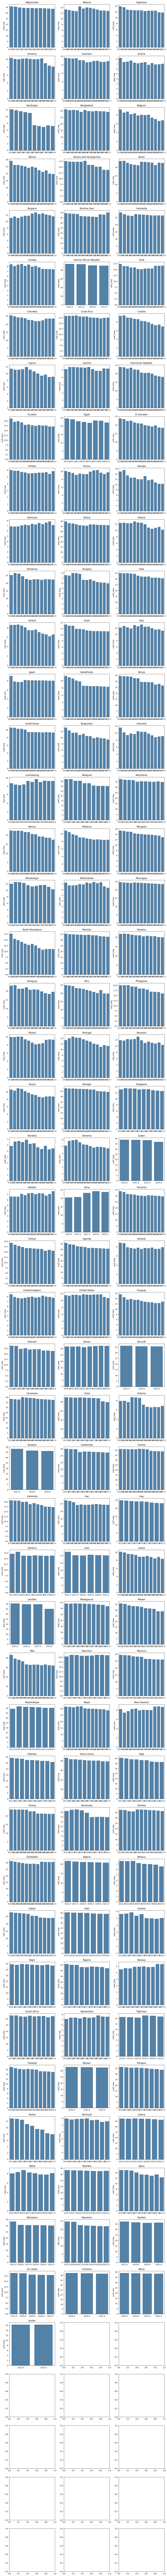

In [27]:
fig,axes = plt.subplots(50,3, figsize =(15,250))
count = 0
for item in country_names_lst:
    sns.barplot(data = df_extract[df_extract['country_name'] == item],
                 x = 'year_y', y = 'coef_ineq', 
                 ax=axes[int(count/3)][count%3], color='steelblue').set(title=item, xlabel='')
    count += 1